In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('fake_job_postings.csv')

In [4]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
data.shape

(17880, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [11]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

# Data Pre-processing

In [14]:
# Deal with missing values and drop unneccessary columns

# Location missing values will be assigned none
data['location'] = data.location.fillna('none')

# department missing values will be assigned not specified
data['department'] = data.department.fillna('not specified')

# drop salary range, benefits, telecommuting, has_questions (not compulsory) in the context of Nigeria
data.drop(['salary_range', 'benefits','telecommuting','has_questions'],
             axis=1, inplace=True)

# Company profile missing values will be assigned none
data['company_profile'] = data.company_profile.fillna('none')

# Company profile missing values will be assigned not specified
data['requirements'] = data.requirements.fillna('not specified')

# employment_type missing values will be assigned not specified
data['employment_type'] = data.employment_type.fillna('not specified')

# required_experience missing values will be assigned not specified
data['required_experience'] = data.required_experience.fillna('not specified')

# required_education missing values will be assigned not specified
data['required_education'] = data.required_education.fillna('not specified')

# industry missing values will be assigned not specified
data['industry'] = data.industry.fillna('not specified')

# function missing values will be assigned not specified
data['function'] = data.function.fillna('not specified')

In [16]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
company_profile        0
description            1
requirements           0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [18]:
data.head()

,job_id,title,location,department,company_profile,description,requirements,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,1,Other,Internship,not specified,not specified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,1,Full-time,Not Applicable,not specified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",not specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,1,not specified,not specified,not specified,not specified,not specified,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",not specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [20]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'company_profile',
       'description', 'requirements', 'has_company_logo', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [30]:
print('Data set:')
for col_name in data.columns:
    if data[col_name].dtypes == 'object' :
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()

Data set:
Feature 'title' has 11231 categories
Feature 'location' has 3106 categories
Feature 'department' has 1338 categories
Feature 'company_profile' has 1710 categories
Feature 'description' has 14802 categories
Feature 'requirements' has 11968 categories
Feature 'employment_type' has 6 categories
Feature 'required_experience' has 8 categories
Feature 'required_education' has 14 categories
Feature 'industry' has 132 categories
Feature 'function' has 38 categories



In [32]:
df = data[['title', 'location','company_profile', 'requirements', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent']]

In [34]:
# Check if there is any null value
df.isna().apply(pd.value_counts)

C:\Users\vigne\AppData\Local\Temp\ipykernel_25576\3851260468.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df.isna().apply(pd.value_counts)


,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function,fraudulent
False,17880,17880,17880,17880,17880,17880,17880,17880,17880,17880


In [36]:
#Check for number of null values
df.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [38]:
df_num = df[['fraudulent']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

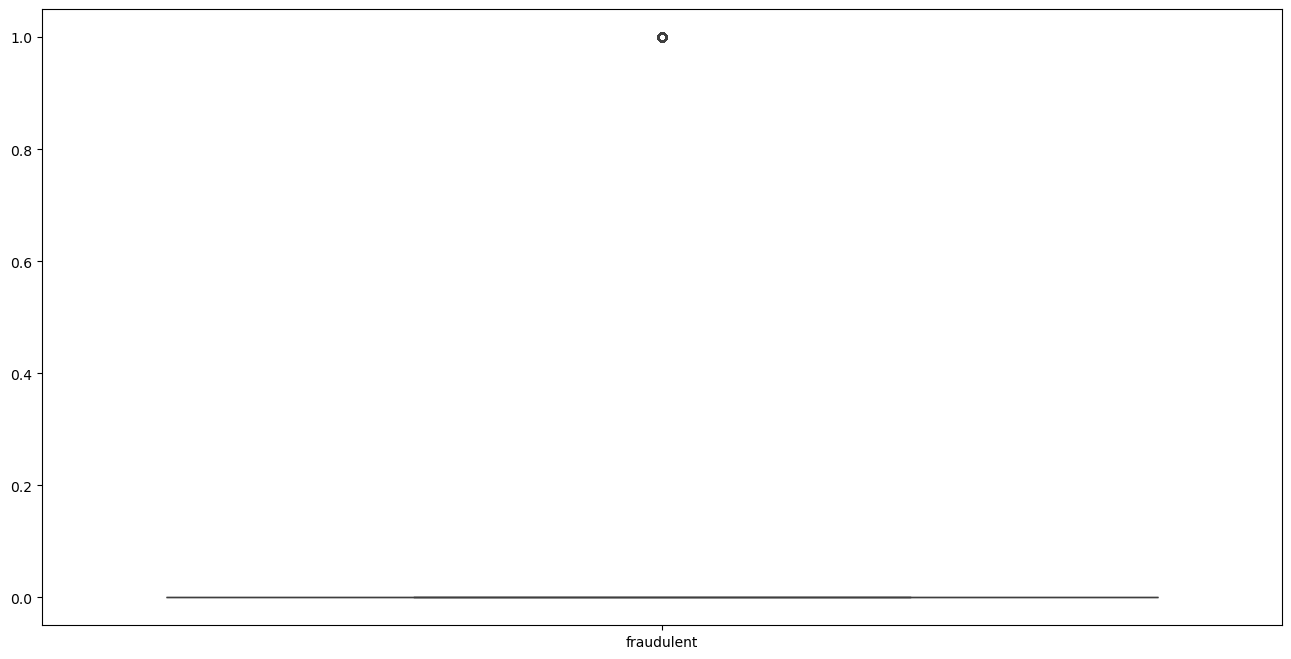

In [40]:
# Checking for Outliers in numerical data
plt.figure(figsize=[16,8])
sns.boxplot(data = df_num)
plt.show()

In [42]:
#Removing Outliers from columns
df_num = df_num[df_num['fraudulent'] < 0.9 ]

In [44]:
df.shape


(17880, 10)